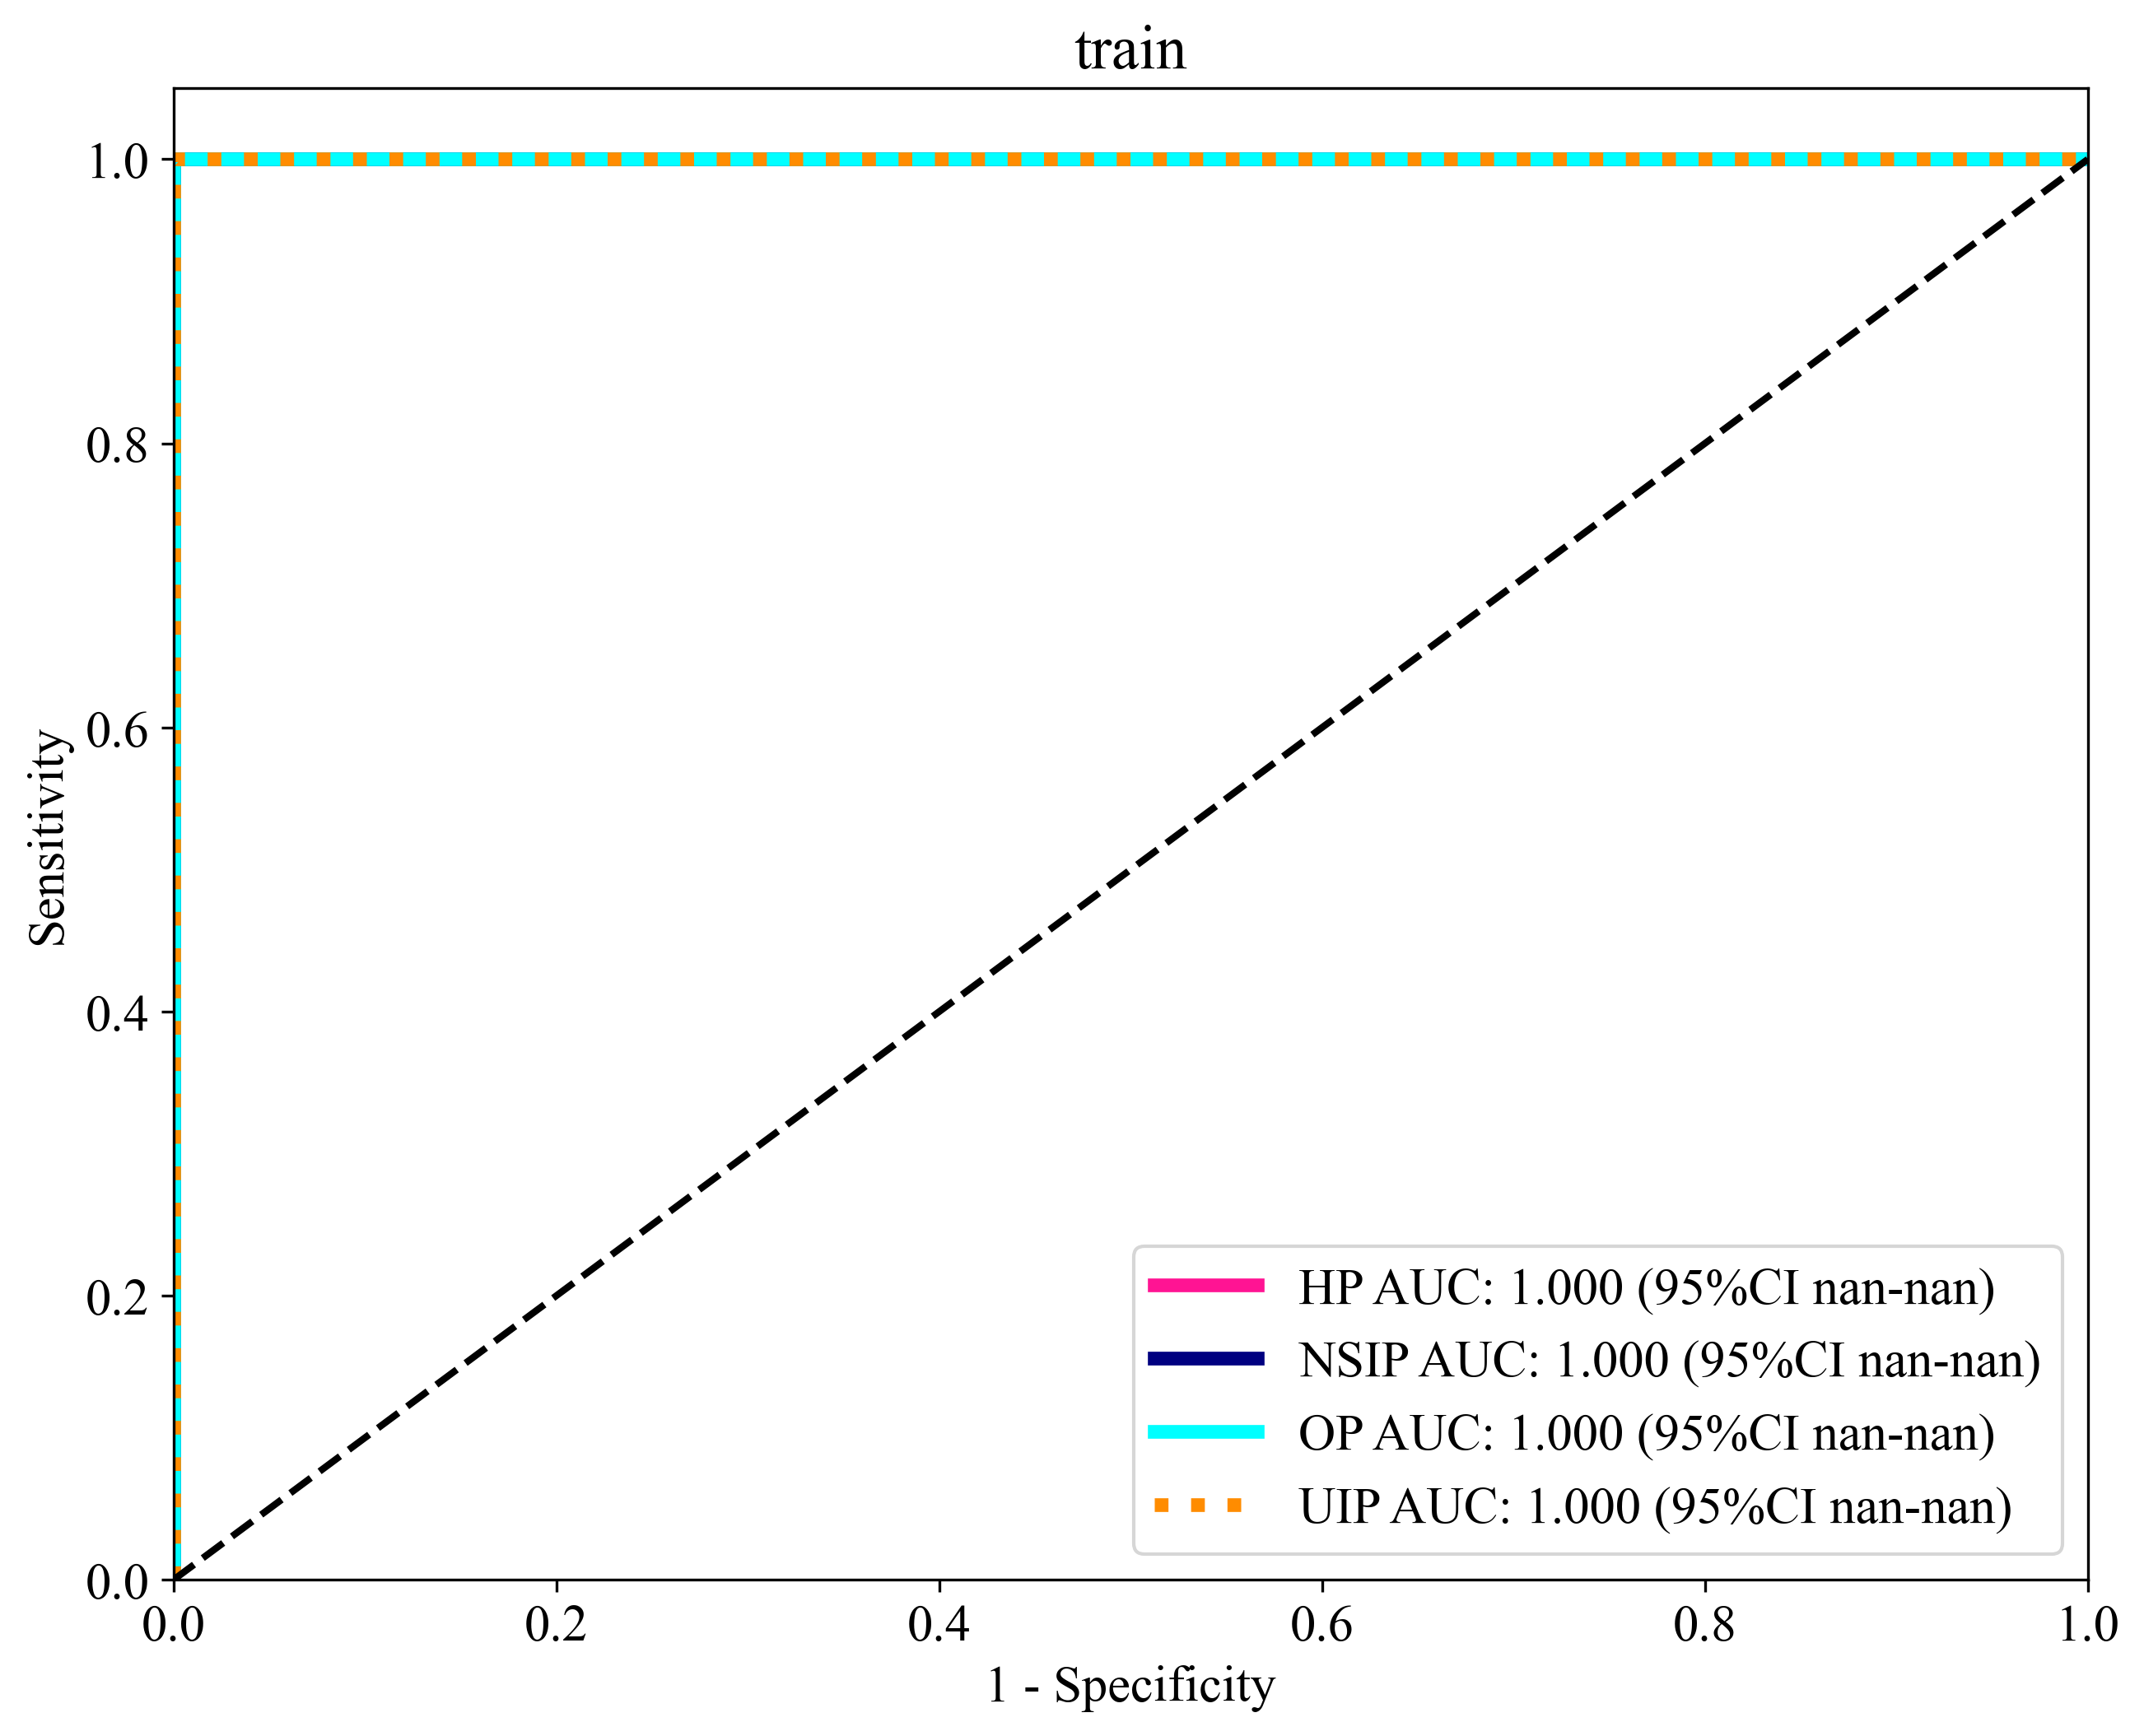

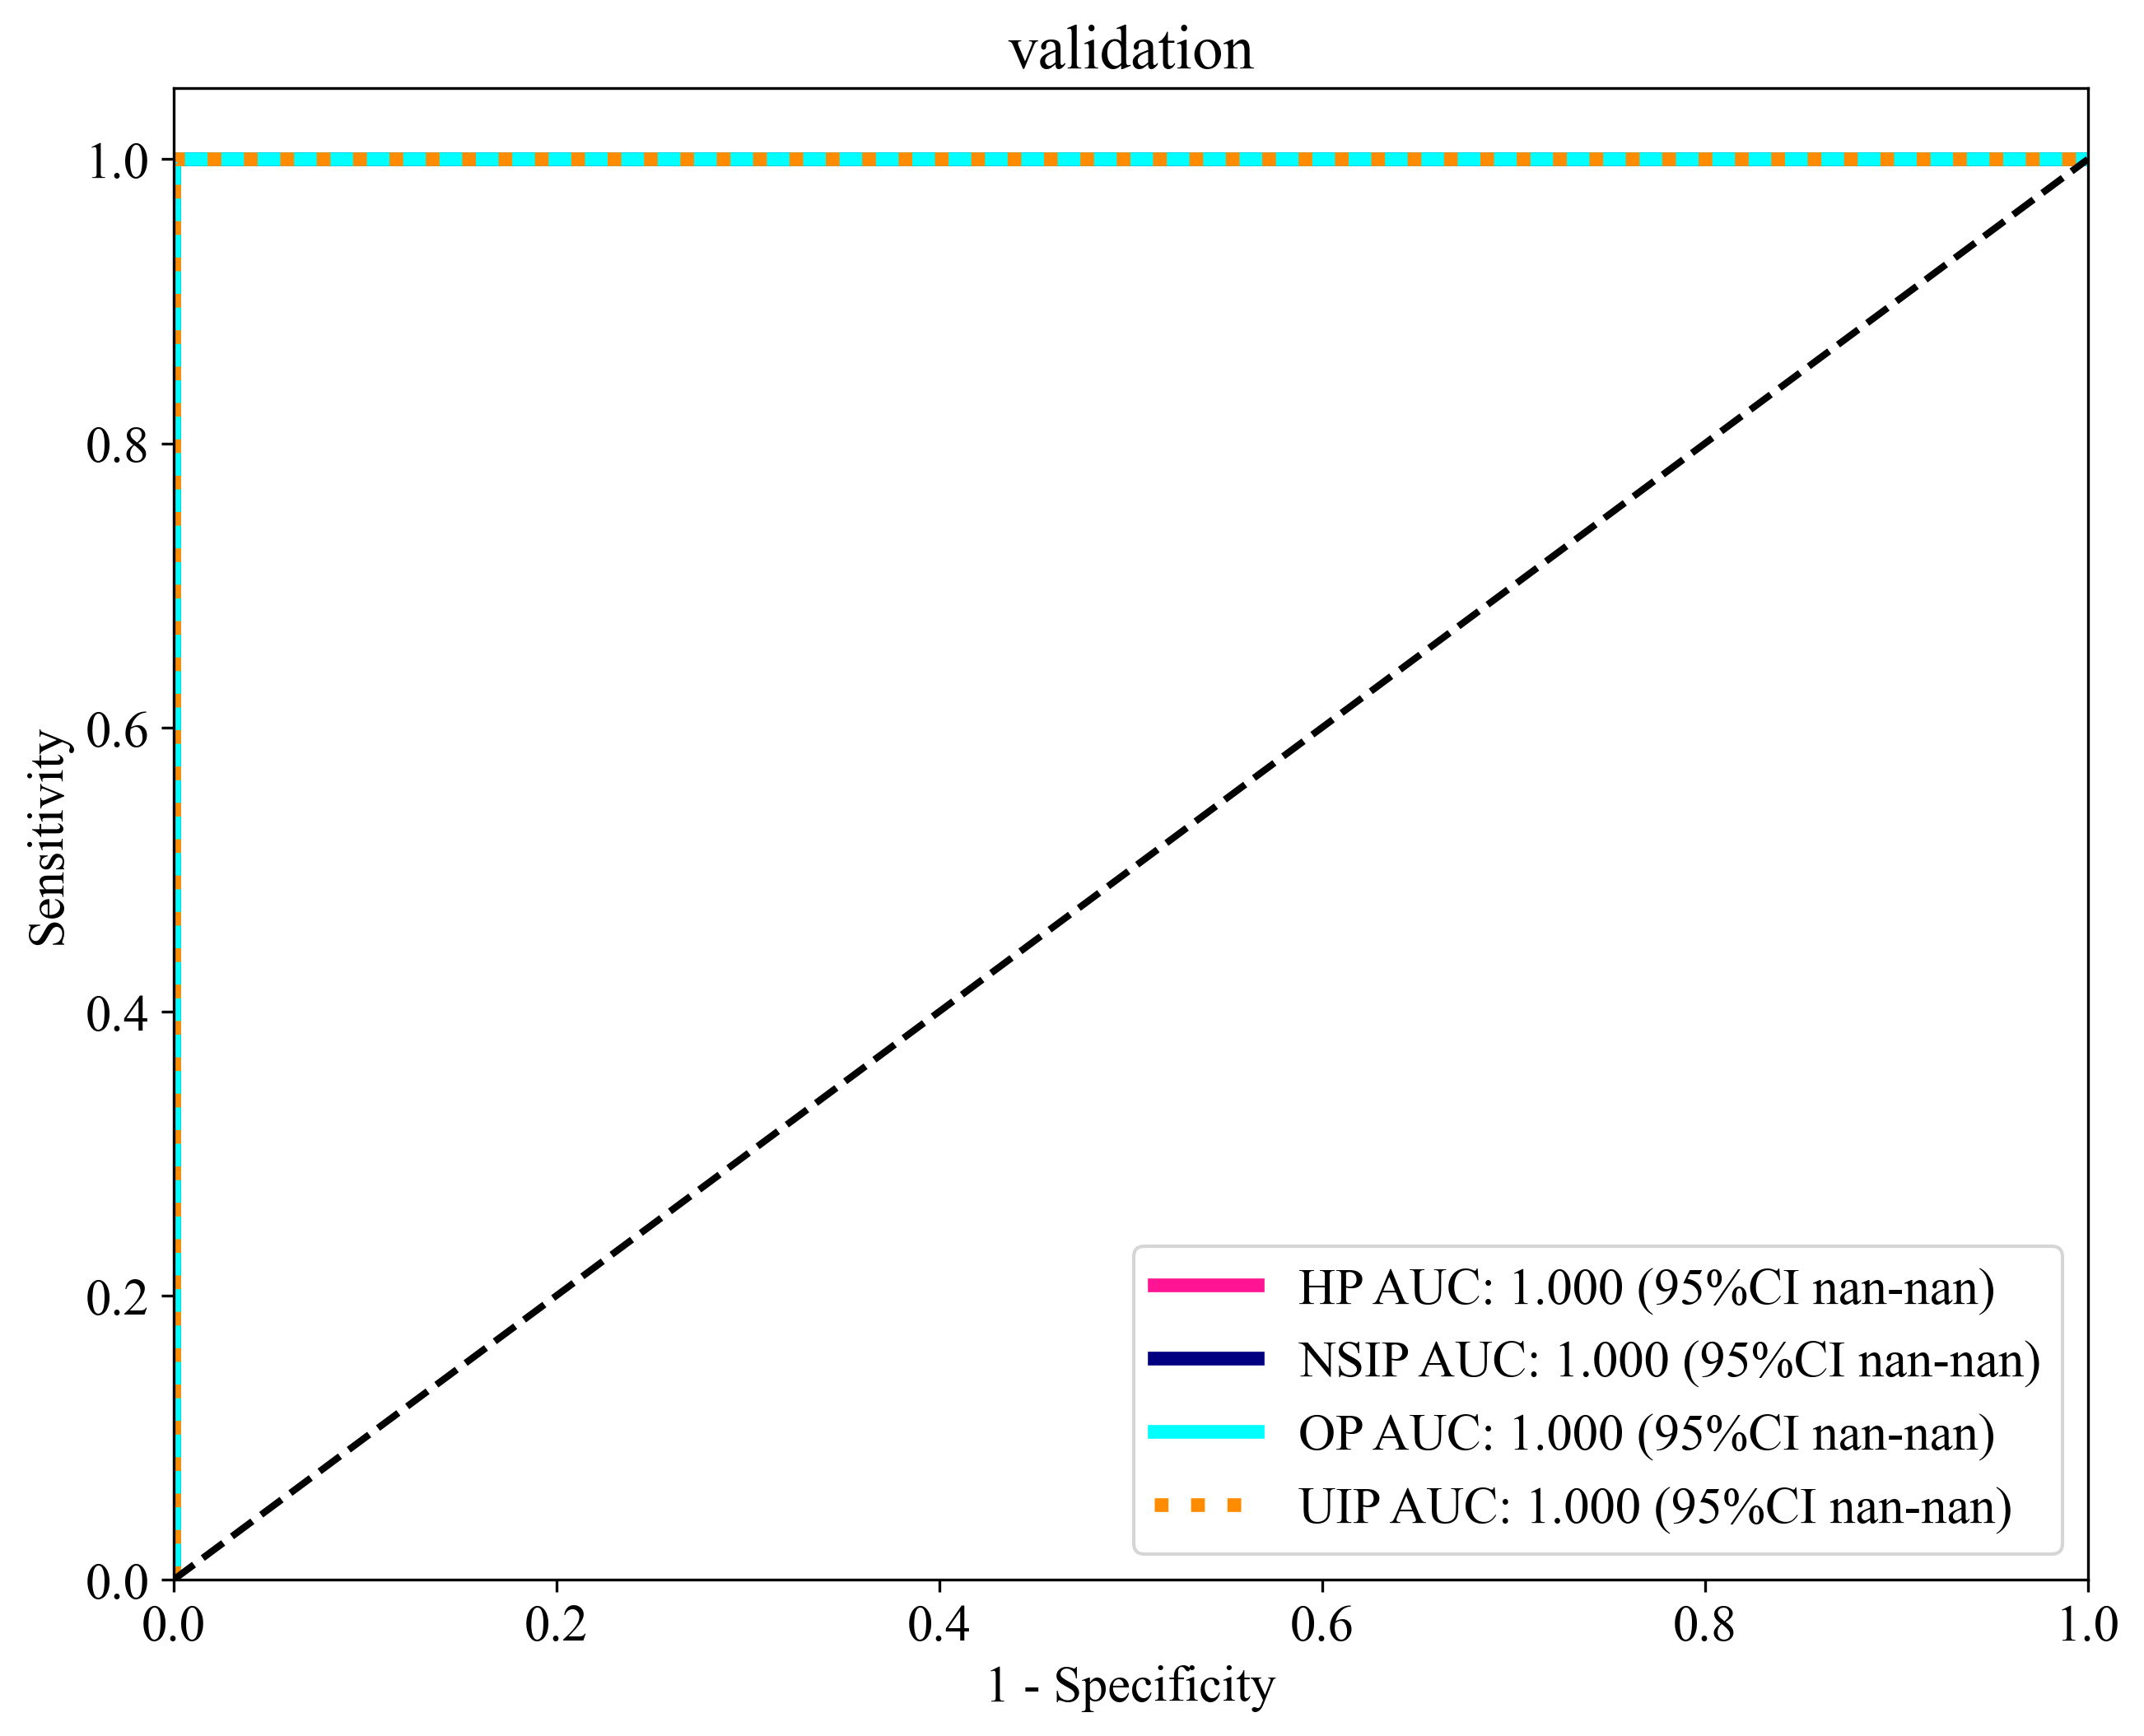

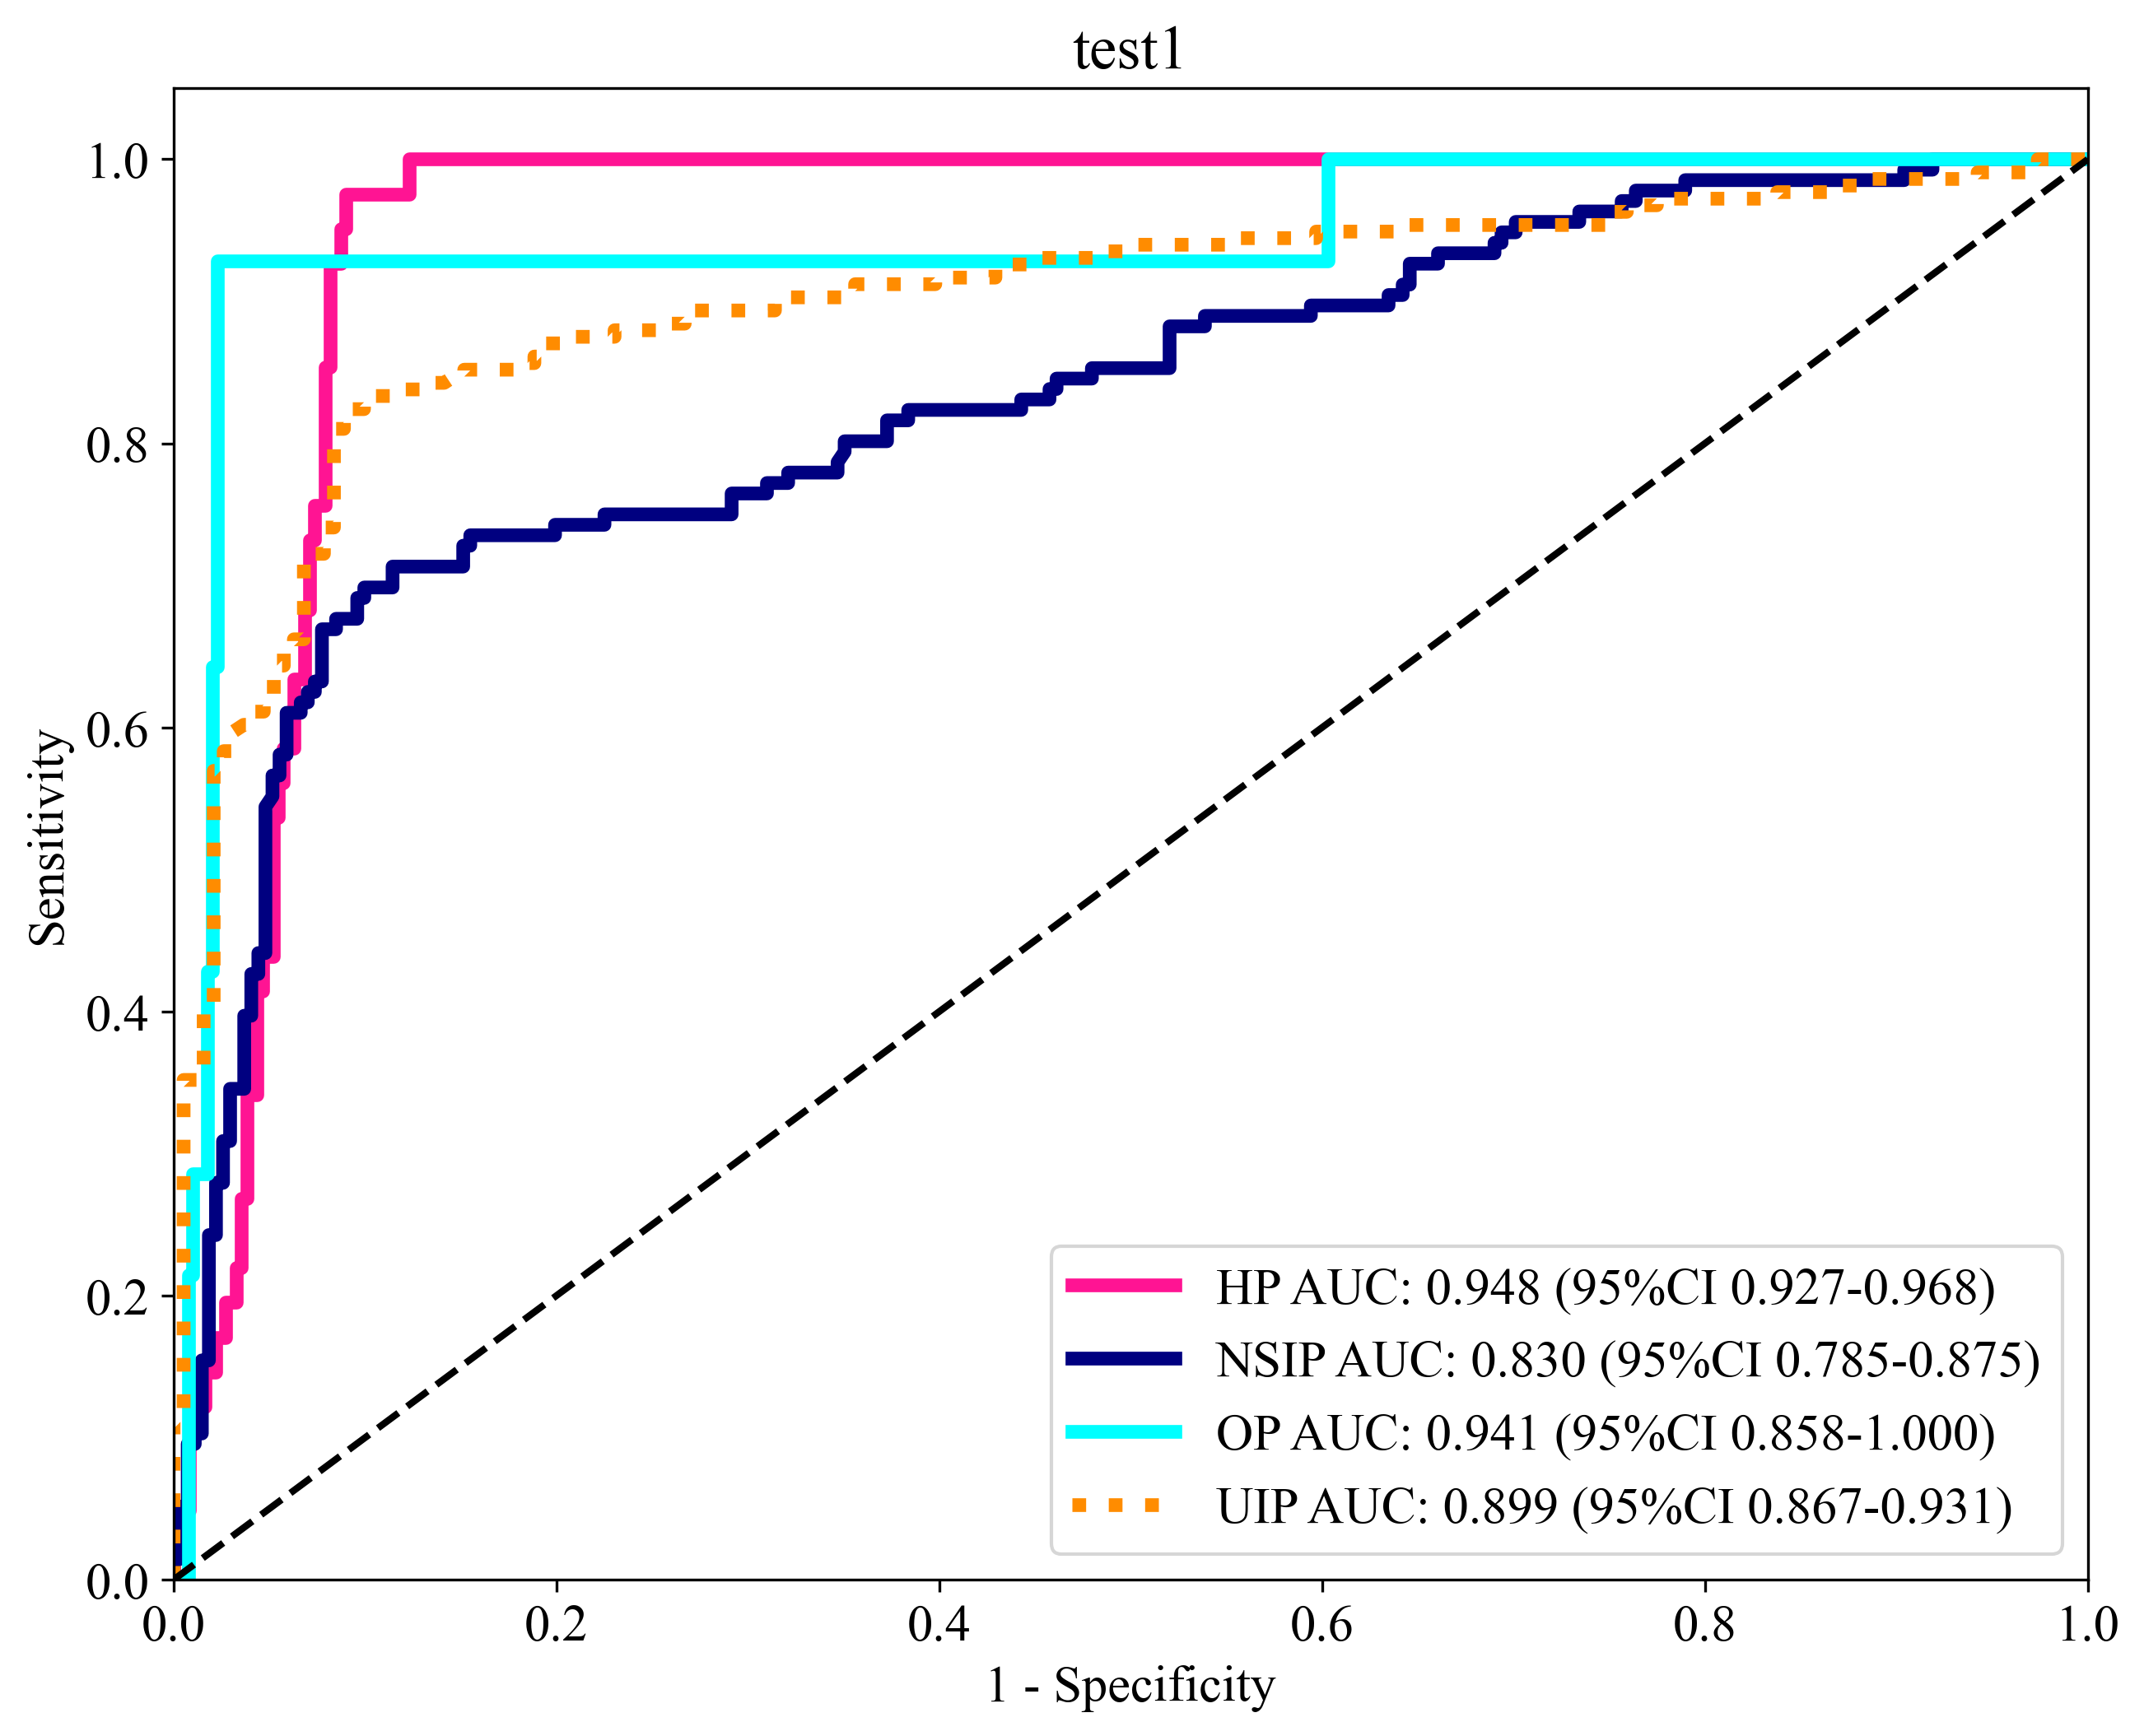

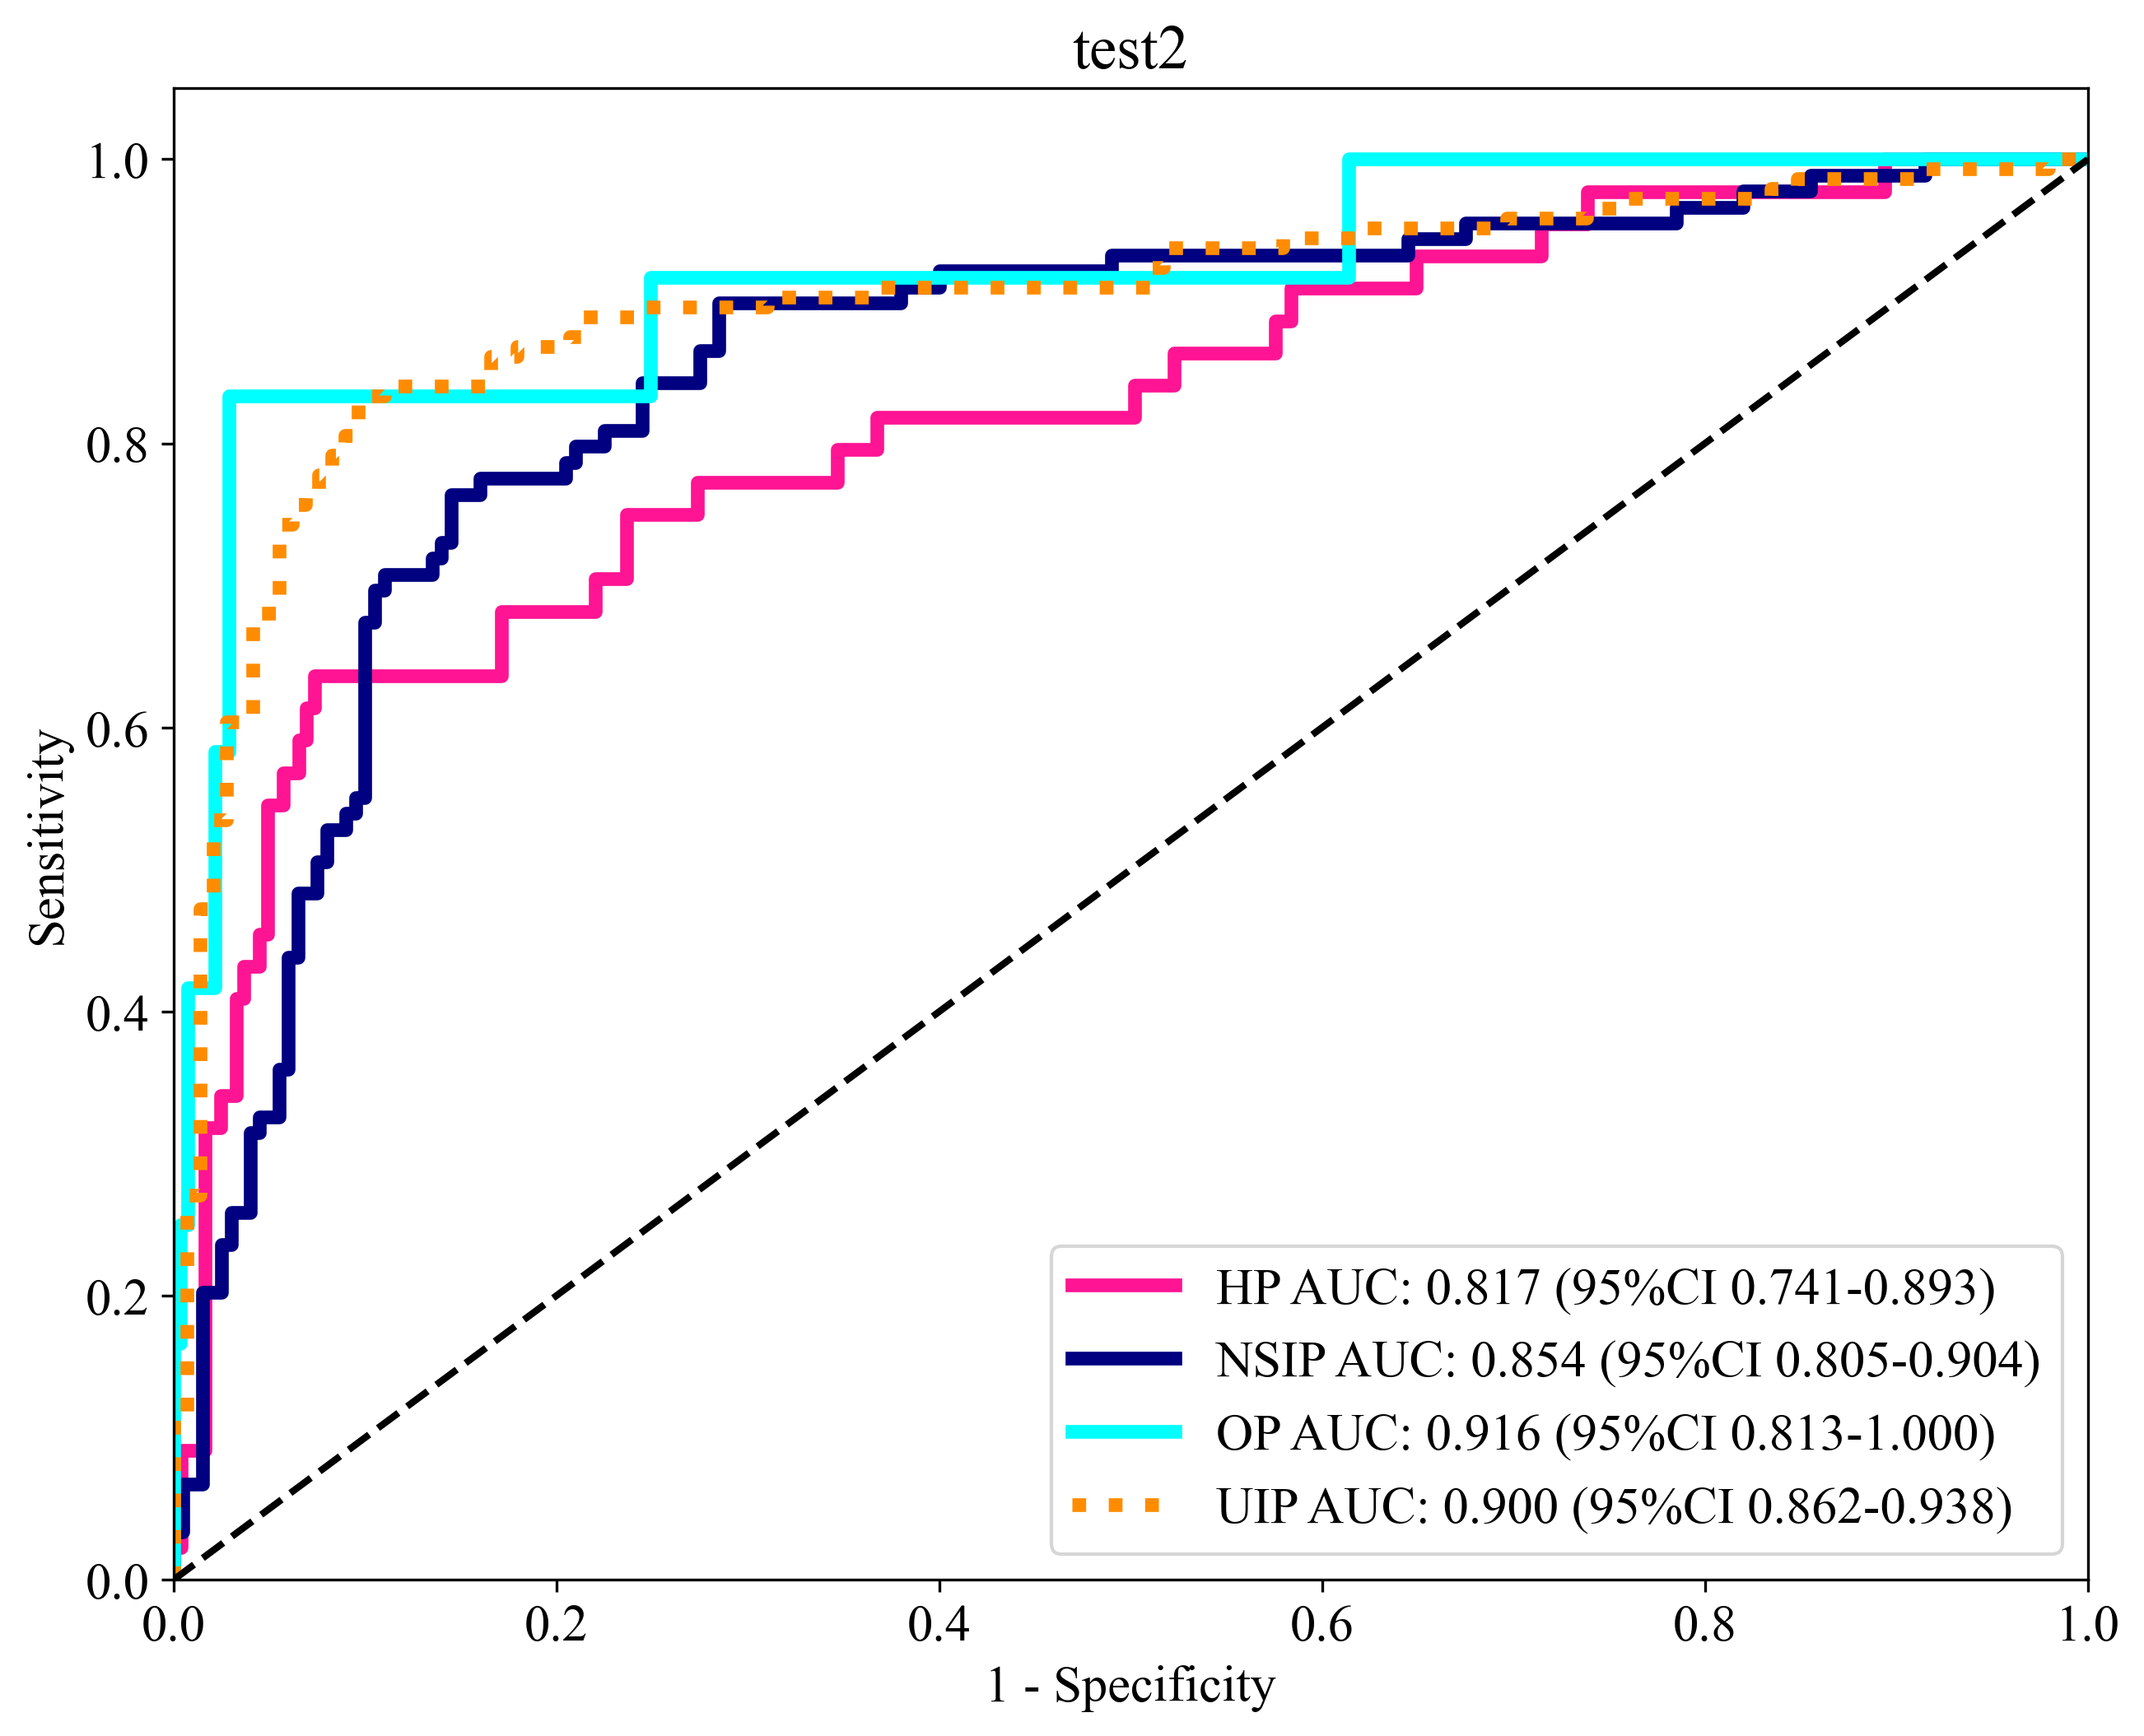

,DataSet,Acc,AUC,95% CI,Sensitivity,Specificity,PPV,NPV,Precision,Recall,F1,Threshold,Class
0,train,1.000,1.000,1.0000-1.0000,0.999,1.000,1.000,1.000,1.000,0.999,0.999,0.820,HP
1,train,1.000,1.000,1.0000-1.0000,0.999,1.000,1.000,1.000,1.000,0.999,1.000,0.815,NSIP
2,train,1.000,1.000,1.0000-1.0000,0.997,1.000,1.000,1.000,1.000,0.997,0.998,0.988,OP
3,train,1.000,1.000,1.0000-1.0000,0.999,1.000,1.000,1.000,1.000,0.999,1.000,0.943,UIP
4,validation,0.999,1.000,1.0000-1.0000,0.994,1.000,1.000,0.999,1.000,0.994,0.997,0.820,HP
5,validation,0.999,1.000,1.0000-1.0000,0.996,1.000,1.000,0.998,1.000,0.996,0.998,0.815,NSIP
6,validation,0.999,1.000,1.0000-1.0000,0.984,1.000,1.000,0.999,1.000,0.984,0.992,0.988,OP
7,validation,0.999,1.000,1.0000-1.0000,0.997,1.000,1.000,0.998,1.000,0.997,0.999,0.943,UIP
8,test1,0.914,0.948,0.9268-0.9684,0.951,0.910,0.542,0.994,0.542,0.951,0.690,0.820,HP
9,test1,0.830,0.830,0.7847-0.8748,0.691,0.900,0.777,0.853,0.777,0.691,0.732,0.815,NSIP


In [11]:
import os
import numpy as np
import pandas as pd

from onekey_algo.custom.components.comp1 import draw_roc
from onekey_algo.custom.components import metrics
import matplotlib.pyplot as plt
from onekey_algo import get_param_in_cwd

metric_results = []
label_data = pd.read_csv(r"J:\4type\model\histogramWRT\human_ai\label.csv")
save_dir = r'J:\4type\model\histogramWRT\metrics'
prefix = r"J:\4type\Table1.xlsx"

os.makedirs(save_dir, exist_ok=True)

ann = ['HP', 'NSIP', 'OP', 'UIP']
Thres = {"HP":0.8199912606845599,"NSIP":0.8152361404933238,"OP":0.9880247201189118,"UIP":0.9428299221681102}
for subset in ['train', 'validation','test1','test2']:
    all_pred = []
    all_gt = []
    all_labels = []
    val_log = pd.read_excel(prefix,sheet_name = 'all')
    val_log = val_log.loc[val_log['DataSet']==subset,:]
    ul_labels = np.unique(val_log['label'])
    for ul in ul_labels:
        pred_score = val_log[f"{ann[ul]}"]
        gt = [1 if gt_ == ul else 0 for gt_ in np.array(val_log['label'])]
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = metrics.analysis_pred_binary(gt, pred_score)
        thres = Thres[ann[ul]]
        ci = f"{ci[0]:.4f}-{ci[1]:.4f}"
        metric_results.append([subset, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, f"{ann[ul]}"])

        all_pred.append(np.array(pred_score))
        all_gt.append(gt)
        all_labels.append(f"{ann[ul]}")

    draw_roc(all_gt, all_pred, labels=all_labels, title=f"{subset}", ls=['-', '-', '-', ':', ':', ':'])
    plt.savefig(os.path.join(save_dir, f'{subset}_roc.svg'), bbox_inches = 'tight')
    plt.show()
metrics = pd.DataFrame(metric_results, 
                       columns=['DataSet', 'Acc', 'AUC', '95% CI', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                                'Precision', 'Recall', 'F1', 'Threshold', 'Class'])
metrics.to_csv(r"J:\4type\model\histogramWRT\metrics\Results.csv",index=False)
metrics